In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
img = cv2.imread('original_img.jpg')
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    # Convert the image from BGR to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
# Pixels is a 2D array with a shape of (total_number_of_pixels, 3)
# Each row represents a pixel the 3 columns contain the RGB values
pixels = img.reshape((-1, 3)).astype(np.float32)


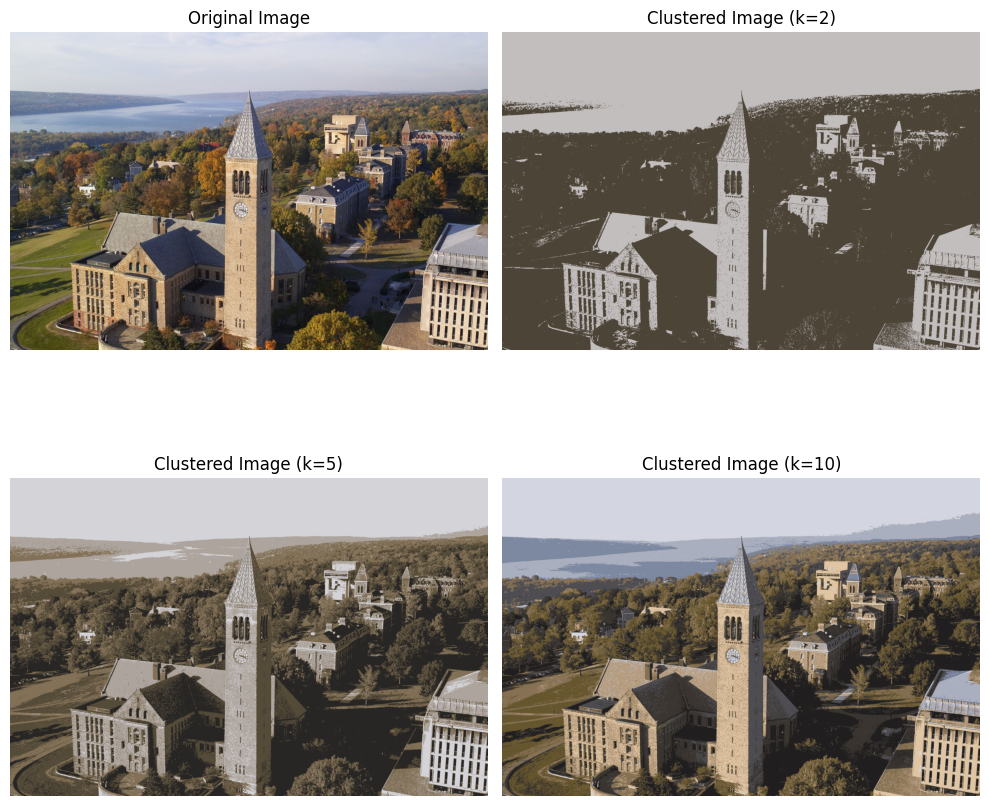

In [6]:
# This cell displays the original image and 3 clustered images in a 2x2 grid

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)  # (rows, cols, position)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

k_values = [2, 5, 10]
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(pixels)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    clustered_img = cluster_centers[labels].reshape(img.shape).astype(np.uint8)


    plt.subplot(2, 2, i + 2) 
    plt.imshow(clustered_img)
    plt.title(f"Clustered Image (k={k})")
    plt.axis('off')

plt.tight_layout()
plt.show()

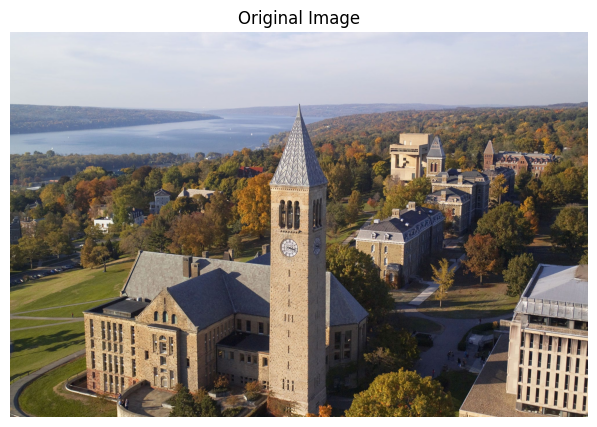

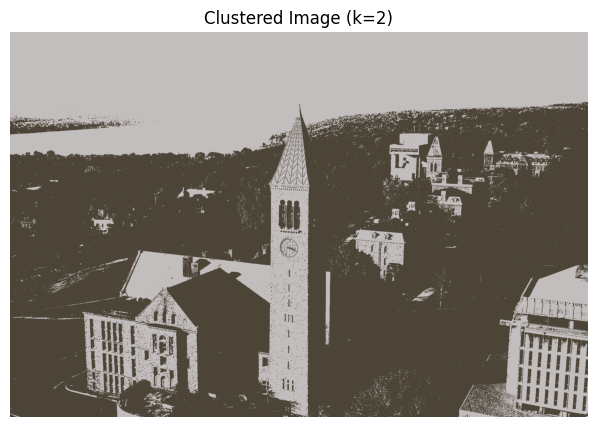

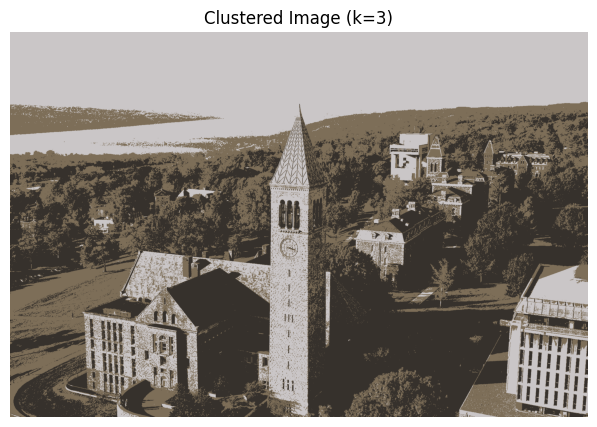

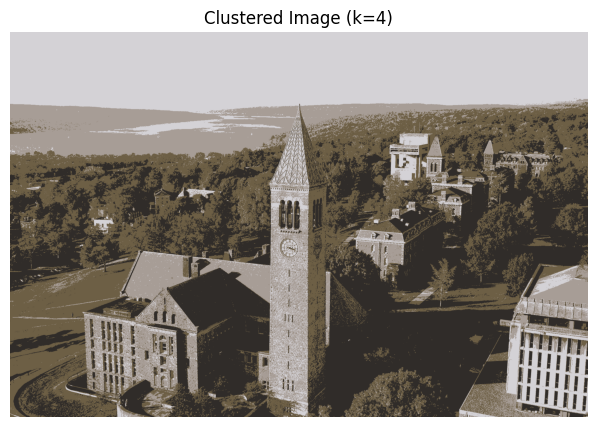

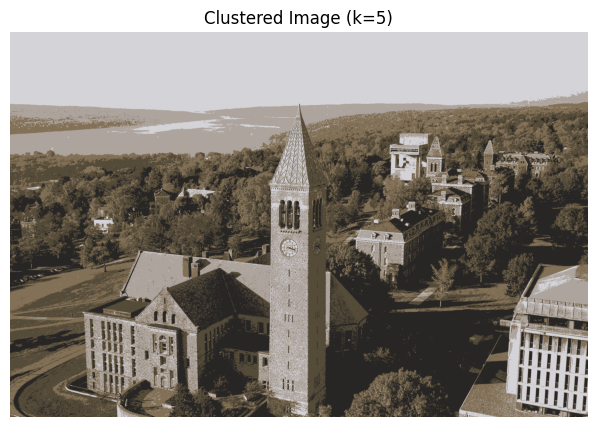

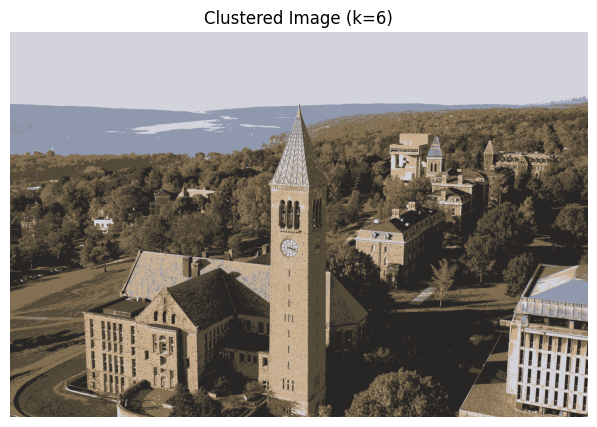

In [14]:
# This cell displays the original image and clustered images for different values of k in a vertical line

plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Adjust to try different k values
k_values = [2,3,4,5,6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(pixels)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Replace the RGB value of each pixel with the RGB value of the cluser center
    # Convert back to original image dimensions
    # Convert the RGB values to 8-bit integers for valid image representation
    clustered_img = cluster_centers[labels].reshape(img.shape).astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.imshow(clustered_img)
    plt.title(f"Clustered Image (k={k})")
    plt.axis('off')
    plt.show()
